<a href="https://colab.research.google.com/github/WONYOUNG-SONG/DeepLearningTensorFlow2/blob/main/Lab09_NNforXOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab09: Neural Nets(NN) for XOR**

**Neural network has input, hidden, and output layers**

<div>
  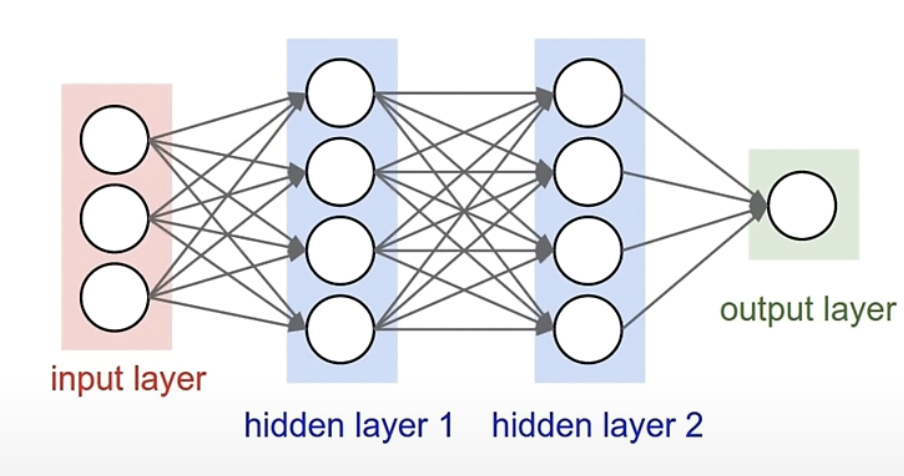
</div>

**What is XOR?**

**XOR is:**

|x|y|x xor y|
|---|---|---|
|0|0|1|
|0|1|0|
|1|0|0|
|1|1|1|

**One logistic regression unit cannot separte XOR**

<div>
  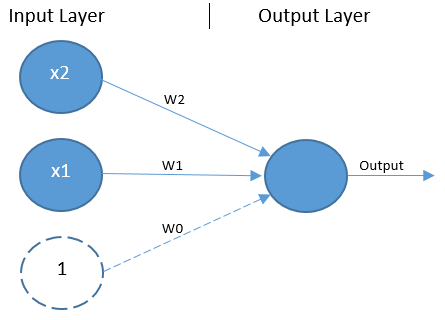
</div>

reference: https://dev.to/jbahire/demystifying-the-xor-problem-1blk

**Let's check it with this code.**

In [ ]:
# Lab 9 XOR
import tensorflow as tf
import numpy as np

x_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y_data = np.array([[0], [1], [1], [0]], dtype=np.float32)

tf.model = tf.keras.Sequential()
tf.model.add(tf.keras.layers.Dense(units=1, input_dim=2, activation='sigmoid'))
tf.model.compile(loss='binary_crossentropy', optimizer=tf.optimizers.SGD(learning_rate=0.01),  metrics=['accuracy'])
tf.model.summary()

history = tf.model.fit(x_data, y_data, epochs=10000)

predictions = tf.model.predict(x_data)
print('Prediction: \n', predictions)

score = tf.model.evaluate(x_data, y_data)
print('Accuracy: ', score[1])


**As you can see, this simple logistic regression doesn't work for XOR problem.**

**Let's add a hidden layer to create a neural network.**

<div>
  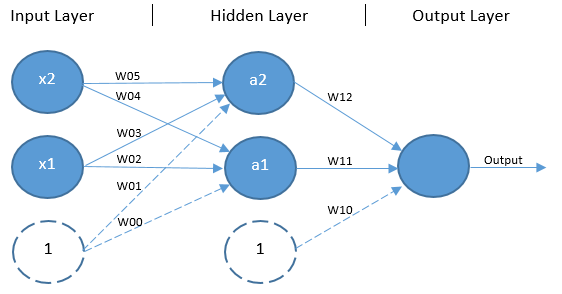
</div>

In [ ]:
# Lab 9 XOR
import tensorflow as tf
import numpy as np

x_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y_data = np.array([[0], [1], [1], [0]], dtype=np.float32)

tf.model = tf.keras.Sequential()
tf.model.add(tf.keras.layers.Dense(units=2, input_dim=2))
tf.model.add(tf.keras.layers.Activation('sigmoid'))
tf.model.add(tf.keras.layers.Dense(units=1, input_dim=2))
tf.model.add(tf.keras.layers.Activation('sigmoid'))
tf.model.compile(loss='binary_crossentropy', optimizer=tf.optimizers.SGD(learning_rate=0.1),  metrics=['accuracy'])
tf.model.summary()

history = tf.model.fit(x_data, y_data, epochs=10000)

predictions = tf.model.predict(x_data)
print('Prediction: \n', predictions)

score = tf.model.evaluate(x_data, y_data)
print('Accuracy: ', score[1])

**Is the output accurate? How long does it take to complete the training?**

**Well, with only one hidden layer, it is still too slow and inaccurate.**

**Let's try to make this network deeper adding more hidden layers.**

<div>
  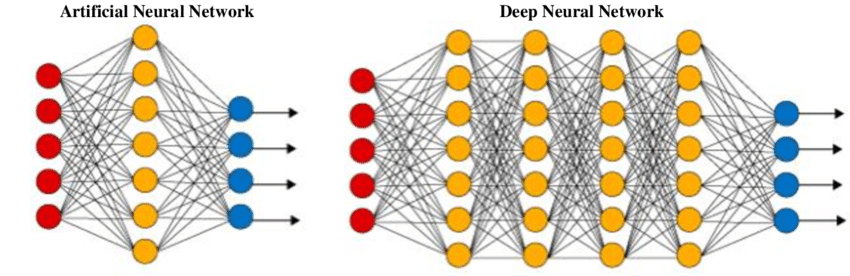
</div>

source: https://www.datacamp.com/tutorial/introduction-to-deep-neural-networks

In [ ]:
# Lab 9 XOR
# 9-3 deep and wide
import tensorflow as tf
import numpy as np

x_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y_data = np.array([[0], [1], [1], [0]], dtype=np.float32)

tf.model = tf.keras.Sequential()
tf.model.add(tf.keras.layers.Dense(units=10, input_dim=2, activation='sigmoid'))
tf.model.add(tf.keras.layers.Dense(units=10, activation='sigmoid'))
tf.model.add(tf.keras.layers.Dense(units=10, activation='sigmoid'))
tf.model.add(tf.keras.layers.Dense(units=10, activation='sigmoid'))
tf.model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# SGD not working very well due to vanishing gradient problem, switched to Adam for now
# or you may use activation='relu', study chapter 10 to know more on vanishing gradient problem.
tf.model.compile(loss='binary_crossentropy', optimizer=tf.optimizers.Adam(learning_rate=0.1), metrics=['accuracy'])
tf.model.summary()

history = tf.model.fit(x_data, y_data, epochs=1000)

predictions = tf.model.predict(x_data)
print('Prediction: \n', predictions)

score = tf.model.evaluate(x_data, y_data)
print('Accuracy: ', score[1])

**It is faster and more accurate!**
